In [1]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as npr

In [2]:
def schwartz_1factor(S0,mean,volatility,T=1,time=252,N=100,kappa=1):
    X = np.zeros((N,time+1))
    dt = T/time
    mu = mean
    sigma = volatility
    X[:,0] = np.log(S0)
    #alpha = mu
    alpha = mu - ((sigma ** 2) / (2*kappa))
    for i in range(1,time + 1):
        phi = npr.normal(0,1,N)
        X[:,i] = X[:,i-1] + kappa * (alpha - X[:,i-1]) * dt + sigma * phi * np.sqrt(dt)
        #S[i] = S[i-1] * ( 1 + kappa * (mu - np.log(S[i-1])) * dt + sigma * phi * np.sqrt(dt))
    return X

In [3]:
#Parameters
S0 = 100  # Initial price
X0 = np.log(100) # Initial log price
kappa = 1  # Speed of mean reversion
mean = np.log(90)  # Long-term mean
volatility = 0.2  # Volatility
T = 1  # Total time (1 year)
time = 252
dt = T/time
N = 1  # Number of paths to simulate

df = schwartz_1factor(S0,mean,volatility,T,time,N,kappa)

In [4]:
df_mean = df.mean(axis=0)
df_var = df.var(axis=0)

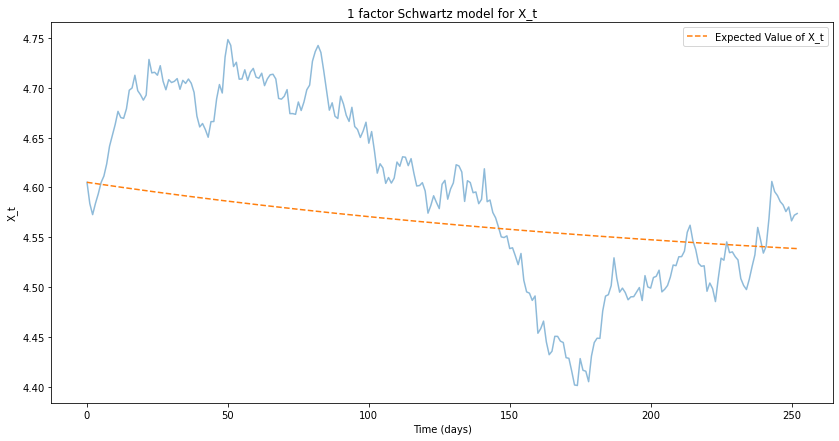

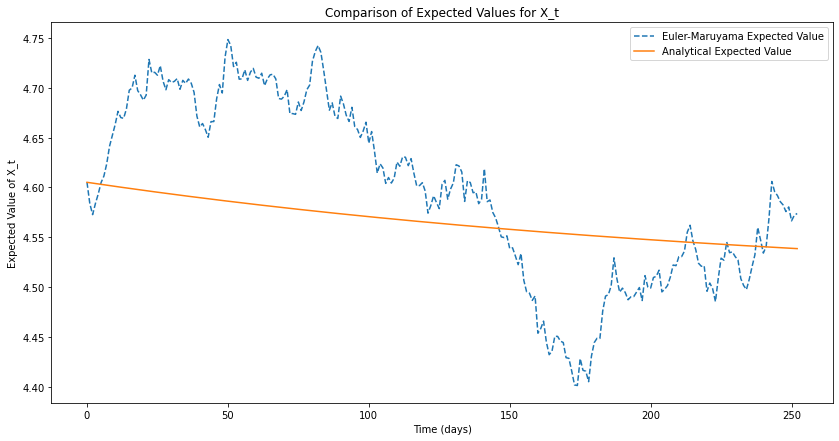

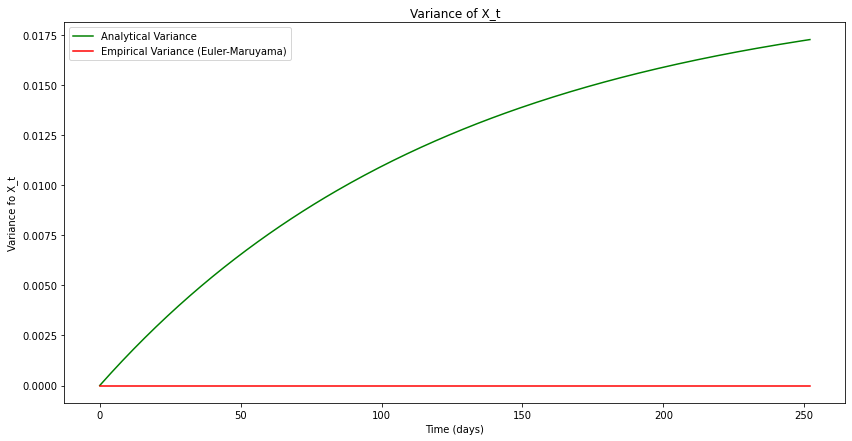

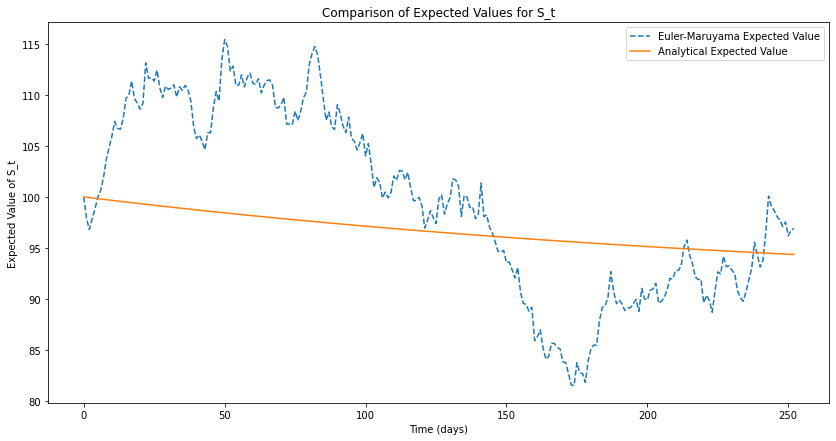

In [5]:
# Analytical expected price and variance of S or X
def expected_log_price(X0, mean, kappa, t):
    return X0 * np.exp(-kappa * t) + mean * (1 - np.exp(-kappa * t))

def variance_log_price(volatility, kappa, t):
    return (volatility ** 2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))

times = np.linspace(0, T* 252, time + 1)

E_Xt = np.array([expected_log_price(np.log(S0), mean, kappa, t) for t in np.linspace(0, T, int(T/dt)+1)])
Var_Xt = np.array([variance_log_price(volatility, kappa, t) for t in np.linspace(0, T, int(T/dt)+1)])

E_St = np.exp(E_Xt + 0.5 * Var_Xt)
Var_St = (np.exp(Var_Xt) - 1) * np.exp(2 * E_Xt + Var_Xt)

# Plot the results
plt.figure(figsize=(14, 7))
for i in range(N):
    plt.plot(times, df[i],alpha = 0.5)
plt.plot(times, E_Xt, label='Expected Value of X_t', linestyle='--')
plt.title('1 factor Schwartz model for X_t')
plt.xlabel('Time (days)')
plt.ylabel('X_t')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, df_mean, label='Euler-Maruyama Expected Value', linestyle='--')
plt.plot(times, E_Xt, label='Analytical Expected Value', linestyle='-')
plt.title('Comparison of Expected Values for X_t')
plt.xlabel('Time (days)')
plt.ylabel('Expected Value of X_t')
plt.legend()
plt.show()


# Plotting variance paths with analytical and empirical variances
plt.figure(figsize=(14, 7))

plt.plot(times, Var_Xt, label='Analytical Variance', color='green')
plt.plot(times, df_var, label='Empirical Variance (Euler-Maruyama)', color='red')
plt.title('Variance of X_t')
plt.xlabel('Time (days)')
plt.ylabel('Variance fo X_t')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, np.exp(df_mean), label='Euler-Maruyama Expected Value', linestyle='--')
plt.plot(times, E_St, label='Analytical Expected Value', linestyle='-')
plt.title('Comparison of Expected Values for S_t')
plt.xlabel('Time (days)')
plt.ylabel('Expected Value of S_t')
plt.legend()
plt.show()

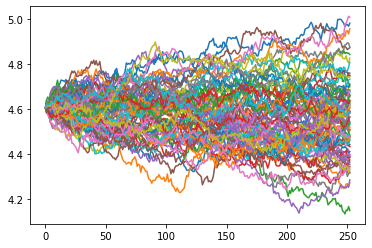

In [8]:
MU = [i for i in range(80,120,5)]
MU
for i in MU:
    for j in range(10):
        plt.plot(times,schwartz_1factor(S0,np.log(i),volatility,T,time,1,kappa)[0])